In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

In [9]:
import io
df = pd.read_csv('Heart_Disease.csv',sep=';')

In [10]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [11]:
df.shape

(70000, 13)

## Data Cleaning 

In [12]:
df.isnull().values.any()

False

In [13]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

In [14]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

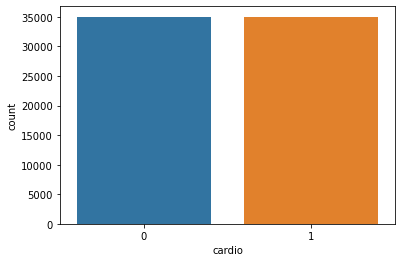

In [15]:
sns.countplot(df['cardio'])

In [16]:
df['years'] = (df['age']/365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast='integer')

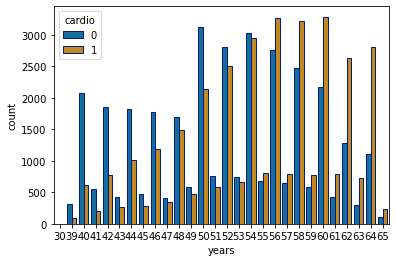

In [17]:
sns.countplot(x='years',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette("dark",n_colors=1))

In [18]:
df.corr()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


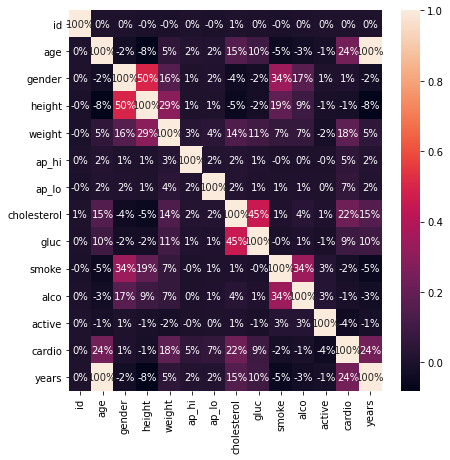

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [20]:
df = df.drop('id', axis=1)
df = df.drop('years', axis=1)

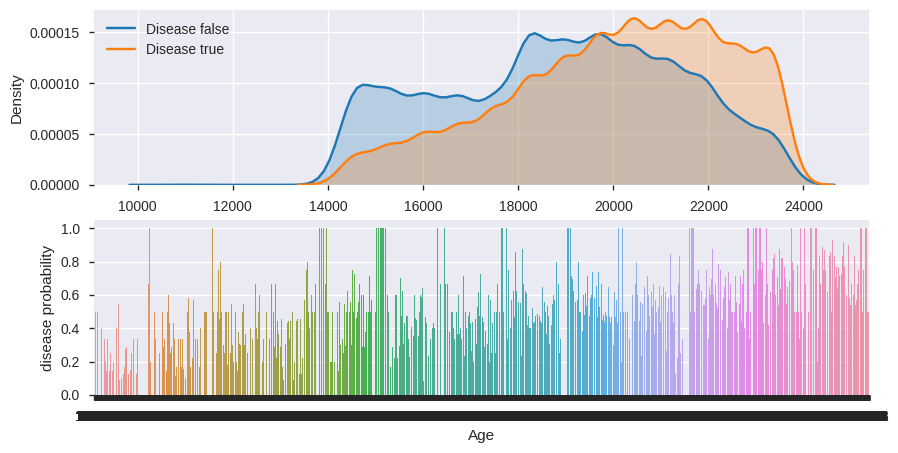

<Figure size 300x300 with 0 Axes>

In [106]:
def plotAge():
    facet_grid = sns.FacetGrid(df, hue='cardio')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['Disease false', 'Disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='Age', ylabel='Density')

    avg = df[["age", "cardio"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='cardio', data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='disease probability')

    plt.clf()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plotAge()


# Model Training

In [0]:
#split the dataset into feature and target dataset 
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [0]:
#split the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Checking accuracy of models


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(Y_test, Y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(Y_test, Y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(Y_test,Y_predict)*100:0.3f}")

## K-nearest Neighbours


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(f"Accuracy of Test Dataset: {knn.score(X_test,Y_test):0.3f}")
print(f"Accuracy of Train Dataset: {knn.score(X_train,Y_train):0.3f}")

Accuracy of Test Dataset: 0.648
Accuracy of Train Dataset: 1.000


In [69]:
Y_predict=knn.predict(X_test)
print("Predicted values:\n")
print(Y_predict)
cal_accuracy(Y_test, Y_predict)

Predicted values:

[1 0 1 ... 1 0 0]

Confusion Matrix: 
 [[5805 2804]
 [3364 5527]]

Accuracy : 64.754


## Gaussian Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
print(f"Accuracy of Test Dataset: {gnb.score(X_test,Y_test):0.3f}")
print(f"Accuracy of Train Dataset: {gnb.score(X_train,Y_train):0.3f}")

Accuracy of Test Dataset: 0.580
Accuracy of Train Dataset: 0.590


In [71]:
Y_predict=gnb.predict(X_test)
print("Predicted values:\n")
print(Y_predict)
cal_accuracy(Y_test, Y_predict)

Predicted values:

[0 0 0 ... 0 0 0]

Confusion Matrix: 
 [[7736  873]
 [6477 2414]]

Accuracy : 58.000


## Logistic Regression


In [72]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_predict=lr.predict(X_test)
print(f"Accuracy of Test Dataset: {lr.score(X_test,Y_test):0.3f}")
print(f"Accuracy of Train Dataset: {lr.score(X_train,Y_train):0.3f}")
warnings.simplefilter('ignore')

Accuracy of Test Dataset: 0.720
Accuracy of Train Dataset: 0.723


In [73]:
print("Predicted values:") 
print(Y_predict)
cal_accuracy(Y_test, Y_predict)

Predicted values:
[1 0 1 ... 1 1 0]

Confusion Matrix: 
 [[6626 1983]
 [2923 5968]]

Accuracy : 71.966


## Support Vector Machine

In [74]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {svm_linear.score(X_test,Y_test):0.3f}")
print(f"Accuracy of Train Dataset: {svm_linear.score(X_train,Y_train):0.3f}")

Accuracy of Test Dataset: 0.723
Accuracy of Train Dataset: 0.723


In [75]:
print("Predicted values:") 
print(Y_predict)
cal_accuracy(Y_test, Y_predict)

Predicted values:
[1 0 1 ... 1 1 0]

Confusion Matrix: 
 [[6626 1983]
 [2923 5968]]

Accuracy : 71.966


## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
DT.fit(X_train, Y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {DT.score(X_test,Y_test):0.3f}")
print(f"Accuracy of Train Dataset: {DT.score(X_train,Y_train):0.3f}")

Accuracy of Test Dataset: 0.730
Accuracy of Train Dataset: 0.725


In [77]:
Y_predict=DT.predict(X_test) 
print("Predicted values:\n")
print(Y_predict) 
cal_accuracy(Y_test, Y_predict)

Predicted values:

[1 0 1 ... 1 1 0]

Confusion Matrix: 
 [[6716 1893]
 [2839 6052]]

Accuracy : 72.960


## Random Forest Classifier


In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {rfc.score(X_test,Y_test):0.3f}")
print(f"Accuracy of Train Dataset: {rfc.score(X_train,Y_train):0.3f}")

Accuracy of Test Dataset: 0.718
Accuracy of Train Dataset: 1.000


In [79]:
Y_predict=rfc.predict(X_test)
print("Predicted values:\n")
print(Y_predict)
cal_accuracy(Y_test, Y_predict)

Predicted values:

[1 0 1 ... 1 1 0]

Confusion Matrix: 
 [[6377 2232]
 [2704 6187]]

Accuracy : 71.794


# Cross Validation for Models

In [80]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=15, random_state=7)
models=[('Linear Regression', lr), ('K-nearest Neighbours',knn),('Gaussian Naive Bayes',gnb),('Support Vector Machine', svm_linear),('Decision Tree',DT),
        ('Random Forest',rfc)]
warnings.simplefilter('ignore')

for model in models:
    results=model_selection.cross_val_score(model[1],X_train,Y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of  {model[0]}:: {results.mean():.3f}")

Cross validated Accuracy of  Linear Regression:: 0.722
Cross validated Accuracy of  K-nearest Neighbours:: 0.647
Cross validated Accuracy of  Gaussian Naive Bayes:: 0.590
Cross validated Accuracy of  Support Vector Machine:: 0.723
Cross validated Accuracy of  Decision Tree:: 0.725
Cross validated Accuracy of  Random Forest:: 0.715


In [81]:
models=pd.DataFrame({'Model':['Logistics Regression','KNN','GNB','SVM','Decision Tree','Random Forest'],
                     'Traning Accuracy':[(lr.score(X_train,Y_train)),knn.score(X_train,Y_train),gnb.score(X_train,Y_train),svm_linear.score(X_train,Y_train),DT.score(X_train,Y_train),rfc.score(X_train,Y_train)],
                     'Test Accuracy':[(lr.score(X_test,Y_test)),knn.score(X_test,Y_test),gnb.score(X_test,Y_test),svm_linear.score(X_test,Y_test),DT.score(X_test,Y_test),rfc.score(X_test,Y_test)]})
models.sort_values(by='Test Accuracy', ascending=False)

,Model,Traning Accuracy,Test Accuracy
4,Decision Tree,0.724514,0.729600
3,SVM,0.722838,0.723314
0,Logistics Regression,0.722648,0.719657
5,Random Forest,0.999771,0.717943
1,KNN,0.999810,0.647543
2,GNB,0.589695,0.580000


### To improve accuracy


#Feature Elimination

In [0]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score, confusion_matrix

In [0]:
def generate_accuracy_and_heatmap(model,x,y):
  ac=accuracy_score(y,model.predict(x))
  f_score=f1_score(y,model.predict(x))
  print('Accuracy is :',ac)
  print('f1_score is :',f_score)
  print("\n")
  print(pd.crosstab(pd.Series(model.predict(x),name='Predicted'),
                    pd.Series(y['cardio'],name='Actual')))
  return 1

In [84]:
categorical_feature_columns = list(set(df.columns)-set(df._get_numeric_data().columns))
categorical_feature_columns

[]

In [85]:
numeric_feature_columns = list(df._get_numeric_data().columns)
numeric_feature_columns

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [0]:
target = "cardio"

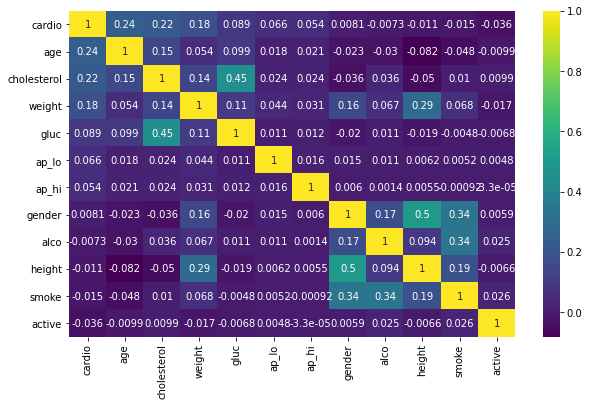

In [87]:
k=15
cols = df[numeric_feature_columns].corr().nlargest(k,target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap="viridis")

In [0]:
X1 = df.loc[:, df.columns != target]
Y1 = df.loc[:, df.columns == target]

In [89]:
X1.shape

(70000, 11)

In [90]:
Y1.shape

(70000, 1)

In [0]:
x_train,x_test, y_train, y_test=train_test_split(X1,Y1, test_size = 0.25, random_state =0)

In [0]:
clf_lr = LogisticRegression()
lr_baseline_model = clf_lr.fit(x_train,y_train)

In [93]:
generate_accuracy_and_heatmap(lr_baseline_model,x_test,y_test)

Accuracy is : 0.6954857142857143
f1_score is : 0.6804581159680998


Actual        0     1
Predicted            
0          1185  1155
1           973   989


1

In [96]:
import statsmodels.api as sm

selected_features=[]
lr=LogisticRegression()
rfe=RFE(lr,20)

warnings.simplefilter('ignore')
rfe.fit(X1.values,Y1.values)
print(rfe.support_)
print(rfe.ranking_)

for i, feature in enumerate(X1.columns.values):
    if rfe.support_[i]:
        selected_features.append(feature)

df_X = X1[selected_features]
df_Y= Y1

lm=sm.Logit(df_Y,df_X)
result = lm.fit()

print(result.summary2())
warnings.simplefilter('ignore')

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.603428
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.129     
Dependent Variable: cardio           AIC:              84501.9377
Date:               2020-05-05 12:43 BIC:              84602.6565
No. Observations:   70000            Log-Likelihood:   -42240.   
Df Model:           10               LL-Null:          -48520.   
Df Residuals:       69989            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           0.0001    0.0000   30.9

In [0]:
X1_train,X1_test, y1_train, y1_test=train_test_split(df_X,df_Y, test_size = 0.25, random_state =0)
columns = X1_train.columns

In [98]:
lr=LogisticRegression()
lr.fit(X1_train,y1_train)
y_predict=lr.predict(X1_test)
print(f"Accuracy of Test Dataset: {lr.score(X1_test,y1_test):0.3f}")
print(f"Accuracy of Train Dataset: {lr.score(X1_train,y1_train):0.3f}")
warnings.simplefilter('ignore')

Accuracy of Test Dataset: 0.695
Accuracy of Train Dataset: 0.698


In [99]:
print("Predicted values:") 
print(y_predict)
cal_accuracy(y1_test, y_predict)

Predicted values:
[0 0 0 ... 0 1 1]

Confusion Matrix: 
 [[6497 2323]
 [3006 5674]]

Accuracy : 69.549
